# Bioinformatics Algorithm

## 过程化考核2: Substitution Matrices

> Last Modified Time 2019-09-16 16:30 By ZeFengZhu

### 问题描述

给出常用的替换矩阵，并说明其具体意义及适用范围

### 基础概念

> Altschul, Stephen. (2008). Substitution Matrices. 10.1002/9780470015902.a0005265.pub2.


#### Score of  Alignment
`Alignment`通常有相应`得分`，两者都可以在排列给定序列对的许多可能的方法中选择，并且比较两对序列的比对。更高的分数通常被认为是优越的，对于一对给定的序列，得分最高的对齐方式称为最优对齐。这种比对的分数通常被用作序列相似性的度量。

`Alignment`的得分通常是被排列成对应的`核苷酸对`或`氨基酸对`的替换分数之和，以及一个序列中的每一个残基的插入另一个的空字符时的空隙分数。`替换矩阵`仅仅是指定用于对齐所有可能的残基对的分数集合。

#### Features of Amino Acid
* 具有相似物理/化学性质的氨基酸在进化过程中比具有不同性质的氨基酸更容易相互替代
    * 疏水: 异亮氨酸和缬氨酸
    * 芳香族: 酪氨酸和苯丙氨酸
    * 带电: 精氨酸和赖氨酸(同具有带点侧链+1)
    * ...
* 具有不同性质的氨基酸相互替代对蛋白有显著影响
    * 如果精氨酸突变为谷氨酸，电荷将从+1变为-1，如此剧烈的变化可能会使蛋白质无用
    * ...
* 20种氨基酸在生物蛋白质中并不是独立、随机、等可能出现
    * 某些氨基酸更常见于DNA(具有更多密码子对应): 例如丝氨酸有四个不同的密码子序列，而色氨酸只有一个，因此统计学上更有可能出现丝氨酸
    * ...


### Match/Mismatch Matrices
最早使用及最简单类型的替换分数是一个“匹配/不匹配”矩阵，该矩阵为所有匹配的核苷酸或氨基酸对分配一个实数正分数，为所有不匹配的核苷酸或氨基酸对分配一个固定的负分数。

#### 适用范围及缺点
* still frequently used for DNA sequence comparison
* but it has a major disadvantage in the protein alignment context (忽视了氨基酸替换的特性)

---

### PAM (Point Accepted Mutation Matrix)
> Dayhoff et al. (1978). A model of evolutionary change in proteins. In Atlas of Protein Sequence and Structure, vol. 5, suppl. 3, 345–352. National Biomedical Research Foundation, Silver Spring, MD, 1978.

* [Reference Note 1](https://binf.snipcademy.com/lessons/pairwise-alignment/dayhoff-model-accepted-point-mutations "Link")

#### Konwledge
1. Based on the rate of divergence between species
2. Developed from Log-odds Substitution Matrices

在1978，Dayhoff和她的小组提出了`Accepted Point Mutations` (PAM)。意思是被自然选择所接受的氨基酸残基的突变。

为了了解蛋白质进化中所接受的氨基酸，Dayhoff等。在71组密切相关的蛋白质（具有至少85％的同一性）中检查了1572个变化，并观察了所有氨基酸取代。因此，该实验仅基于密切相关物种之间的观察。

##### Relative Mutability
Dayhoff组计算了每个氨基酸的相对易变性($R_{ij}$)

$R_{ij} = \dfrac{M_{ij}}{f_i}$

这里，$M_{ij}$ 是残基$j$在给定进化区间内变为$i$的概率。分母$f_i$表示偶然出现的残基$i$的频率。

因此，$R_{ij}$是一个比值比，同时是一个衡量该突变的确实发生而非随机出现的真实性的`indicator`。

由此，Dayhoff等人生成了一个表，列出了氨基酸的相对易变性，标准化为整数:

|Amino Acid|Mutabilities|
-|-
|Asn|134|
|Ser|120|
|Asp|106|
|...|...|
|Leu|40|
|Cys|20|
|Trp|18|


他们发现`asn, ser, asp`最有可能发生突变，而`leu, cys, trp`最不可能发生突变。

Dayhoff还统计了所有蛋白质中各个氨基酸的频率。如果所有氨基酸在蛋白质序列中的概率相等，那么它们的频率都是1.00/20=0.05，但事实并非如如此:

Amino Acid|Probabilities
-|-
Gly|0.089
Ala|0.087
Leu|0.085
...|...
Tyr|0.030
Met|0.015
Trp|0.010

##### Mutation rates vary
如上表，突变率在氨基酸上是不同的，Dayhoff发现了一种经验化的方法来对氨基酸组成和突变率的变化进行归一化。从Dayhoff的实验中，我们可以看到易变和不易变的残基的特征。
* 更容易替换的残基:
    * 天冬酰胺是不带电的极性氨基酸组的一部分，它含有六种具有相似性质的其他氨基酸。
    * ...
* 较不易变残基：
    * 具有重要功能
        * 如果它有特定的电荷，蛋白质很可能需要这种电荷才能保证功能
    * 很难替换
        * 色氨酸独特的结构，更换很困难
    * ...

##### PAM matrices
> 将`PAM-1`自乘N次，可以得到`PAM-N`

根据这些结果，Dayhoff建立了一个`20×20`的突变概率矩阵，计算每个氨基酸变化的得分。这被称为`PAM1`矩阵，它显示了蛋白质发生1%变化的可能性（每100个氨基酸残基中有1个接受点突变）。`PAM1`矩阵是基于至少有85%同源性的蛋白质序列的`Alignment`生成。

在`PAM1`矩阵的生成过程中，一个重要的假设是氨基酸的每一个变化都被假定独立于该位点以前的突变事件。这类假设表明`PAM`是一个`Markov`模型。

我们可以由这个假设生成更多的`PAM`矩阵，用于由较长的进化历史周期而被分隔的序列。例如，一个`PAM250`矩阵就是一个`PAM1`矩阵进行矩阵乘法并自乘250次后的结果。这个矩阵适用于氨基酸同源性约为20%的排列，代表了约25亿年的进化。

ORIGINAL AMINO ACID

NULL | NULL | Ala | Arg | Asn | Asp | Cys | Gln | Glu | Gly | His | Ile | Leu | Lys | Met | Phe | Pro | Ser | Thr | Trp | Tyr | Val
- | - | - | - | - | - | - | - | - | - | - | - | - | - | - | - | - | - | - | - | - | - 
NULL | NULL | A | R | N | D | C | Q | E | G | H | I | L | K | M | F | P | S | T | W | Y | V  
Ala | A | 13 | 6 | 9 | 9 | 5 | 8 | 9 | 12 | 6 | 8 | 6 | 7 | 7 | 4 | 11 | 11 | 11 | 2 | 4 | 9  
Arg | R | 3 | 17 | 4 | 3 | 2 | 5 | 3 | 2 | 6 | 3 | 2 | 9 | 4 | 1 | 4 | 4 | 3 | 7 | 2 | 2  
Asn | N | 4 | 4 | 6 | 7 | 2 | 5 | 6 | 4 | 6 | 3 | 2 | 5 | 3 | 2 | 4 | 5 | 4 | 2 | 3 | 3  
Asp | D | 5 | 4 | 8 | 11 | 1 | 7 | 10 | 5 | 6 | 3 | 2 | 5 | 3 | 1 | 4 | 5 | 5 | 1 | 2 | 3  
Cys | C | 2 | 1 | 1 | 1 | 52 | 1 | 1 | 2 | 2 | 2 | 1 | 1 | 1 | 1 | 2 | 3 | 2 | 1 | 4 | 2  
Gln | Q | 3 | 5 | 5 | 6 | 1 | 10 | 7 | 3 | 7 | 2 | 3 | 5 | 3 | 1 | 4 | 3 | 3 | 1 | 2 | 3  
Glu | E | 5 | 4 | 7 | 11 | 1 | 9 | 12 | 5 | 6 | 3 | 2 | 5 | 3 | 1 | 4 | 5 | 5 | 1 | 2 | 3 
Gly | G | 12 | 5 | 10 | 10 | 4 | 7 | 9 | 27 | 5 | 5 | 4 | 6 | 5 | 3 | 8 | 11 | 9 | 2 | 3 | 7 
His | H | 2 | 5 | 5 | 4 | 2 | 7 | 4 | 2 | 15 | 2 | 2 | 3 | 2 | 2 | 3 | 3 | 2 | 2 | 3 | 2 
Ile | I | 3 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 10 | 6 | 2 | 6 | 5 | 2 | 3 | 4 | 1 | 3 | 9 
Leu | L | 6 | 4 | 4 | 3 | 2 | 6 | 4 | 3 | 5 | 15 | 34 | 4 | 20 | 13 | 5 | 4 | 6 | 6 | 7 | 13  
Lys | K | 6 | 18 | 10 | 8 | 2 | 10 | 8 | 5 | 8 | 5 | 4 | 24 | 9 | 2 | 6 | 8 | 8 | 4 | 3 | 5  
Met | M | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 1 | 2 | 3 | 2 | 6 | 2 | 1 | 1 | 1 | 1 | 1 | 2  
Phe | F | 2 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 3 | 5 | 6 | 1 | 4 | 32 | 1 | 2 | 2 | 4 | 20 | 3 
Pro | P | 7 | 5 | 5 | 4 | 3 | 5 | 4 | 5 | 5 | 3 | 3 | 4 | 3 | 2 | 20 | 6 | 5 | 1 | 2 | 4  
Ser | S | 9 | 6 | 8 | 7 | 7 | 6 | 7 | 9 | 6 | 5 | 4 | 7 | 5 | 3 | 9 | 10 | 9 | 4 | 4 | 6 
Thr | T | 8 | 5 | 6 | 6 | 4 | 5 | 5 | 6 | 4 | 6 | 4 | 6 | 5 | 3 | 6 | 8 | 11 | 2 | 3 | 6 
Trp | W | 0 | 2 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 0 | 0 | 1 | 0 | 1 | 0 | 55 | 1 | 0 
Tyr | Y | 1 | 1 | 2 | 1 | 3 | 1 | 1 | 1 | 3 | 2 | 2 | 1 | 2 | 15 | 1 | 2 | 2 | 3 | 31 | 2 
Val | V | 7 | 4 | 4 | 4 | 4 | 4 | 4 | 4 | 5 | 4 | 15 | 10 | 4 | 10 | 5 | 5 | 5 | 72 | 4 | 17 

##### Probabilty to Log-Odds Scoring
当BLAST对一`Alignment`进行评分时，它不使用上述的概率矩阵。它将矩阵元素转换为整数，并生成一个对数比记分矩阵。

$s_{ij}=10*log(\dfrac{q_{ij}}{p_i})$

这里，$s_{ij}$是对齐任意两个残基的分数。如果值很高，这意味着它很好地对齐。$q_{ij}$是一个残基的数量，我会突变到残基$j$。分母是偶然发生的残基突变的概率。

```

```
例子:

我们取残基M（蛋氨酸）并计算其突变为L（亮氨酸）。这两种氨基酸都有疏水性的侧链，所以它们应该对齐得很好，我们期望得到一个积极的分数。我们将使用`PAM250`突变矩阵:

$S_{mm}=10*log(\dfrac{q_{mm}}{p_m}) \,\,\, \Rightarrow \,\,\, S_{mm}=10*log(\dfrac{0.06}{0.015}) \,\,\, \Rightarrow \,\,\, S_{mm}=6$

```

```

#### 适用范围及缺点
* 使用基于进化模型的密切相关蛋白质之间的比较来推断，建立在进化单点可接受突变（PAM）模型基础上, 理论上适用于研究序列层面的进化与突变
* 基于紧密相关蛋白质家族比对的数据
* 使用马尔可夫模型，所以可以将高度相关蛋白的替代概率外推到远距相关蛋白的概率
* `PAM-N`的`N`值越小，表示氨基酸变异的可能性越小；相似的序列之间比较应该选用`N`值小的矩阵，不太相似的序列之间比较应该选用`N`值大的矩阵:

序列相似度 |打分矩阵
-|-
20% | PAM250
40% | PAM120
50% | PAM80
60% | PAM60


* PAM距离与进化时间之间没有统一的映射，因为蛋白质家族倾向于以非常不同的速率积累变化。
* 一旦PAM1的矩阵有效地误差，那么自乘250后得到的PAM250矩阵的误差就会变得很大
* 随着序列数据的增加，新的PAM矩阵需要构造出来

---

### BLOSUM (BLocks SUbstitution Matrix)
> Henikoff S, Henikoff JG. Amino acid substitution matrices from protein blocks. Proc Natl Acad Sci USA. 1992;89(22):10915–10919. 10.1073/pnas.89.22.10915

* BLOSUM matrices are derived from comparisons of blocks of sequences from the Blocks database.
* A block is an ungapped multiple alignments of highly conserved, short regions.
* The blocks database contains multiple alignments of conserved regions in protein families.

Hangiko和Heniko（1992）提出了一种更为直接的估计目标频率的方法。他们建立了“块”的数据库，它由排列在整个蛋白质家族中相对保守的蛋白质片段组成。构造blosum（用于“block sum”）替换矩阵的$q_{ij}$是通过计算blocks数据库所隐含的所有对齐对残数而简单地导出的。通过对分块内的分块进行聚类，构造出大于二分之一的进化散度的BLUSOM矩阵，该块大于相同的百分数，并且只在簇之间但不在簇内计数对齐的残基。因此，blosum-62矩阵（大致对应于`PAM-180`）是通过对所有相同程度超过62%的片段进行第一次聚类而得到的。随着与blosum矩阵相关的数目的增加，在推导$q_{ij}$时使用了更大比例的密切相关的蛋白质片段。因此，有点令人困惑的是，高编号的blosum和低编号的pam矩阵是为紧密相关的序列量身定制的。

#### Derivation a BLOSUM matrix
The Henikoffs developed a database of "blocks" based on sequences with shared motifs. More than 2,000 blocks of aligned sequence segments were analyzed from more than 500 groups of related proteins. Within each block, they counted the relative frequencies of amino acids and their substitution probabilities

#### Knowledge
A BLOSUM tells us the likelihood of occurrence of each pairwise substitution, and we can use these values to score a pairwise comparison.

Each scoring matrix is constructed based on how identical the ungapped multiple sequence alignments are. For example, BLOSUM62 is derived from blocks containing at most 62% identity in the ungapped sequence aligments.

#### 适用范围及缺点
* 需要有多个`Alignment`，它更容易与类似的序列对齐。
* 不想使插入/删除的计算复杂化。
* 想要专注于保守区域来计算得分矩阵。
* 各种测试表明，BLUSOMU矩阵通常比原始PAM矩阵更能区分真生物关系和偶然相似性。

In [1]:
from Bio.SubsMat import MatrixInfo
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

def plotMatrix(matrix):
    aa_li = [i for i in 'ARNDCQEGHILKMFPSTWYV']
    l = len(aa_li)
    a = pd.DataFrame([[0]*l for i in aa_li])
    for i in range(l):
        for j in range(l):
            try:
                a[i][j] = matrix[(aa_li[i],aa_li[j])]
            except KeyError:
                a[i][j] = matrix[(aa_li[j],aa_li[i])]
    fig = plt.figure(figsize=(10, 8))
    a.columns=aa_li
    a.index=aa_li
    return sns.heatmap(a,annot=True)

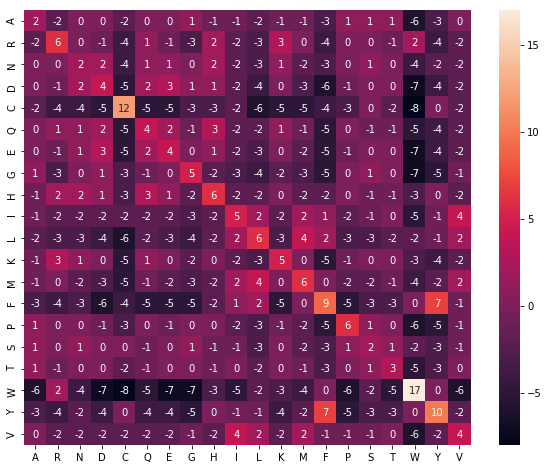

In [2]:
plotMatrix(MatrixInfo.pam250)

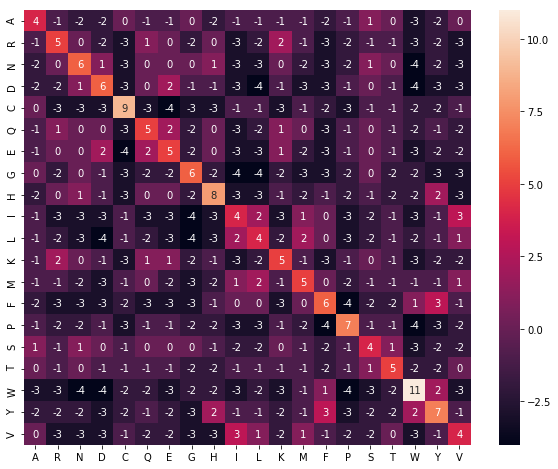

In [3]:
plotMatrix(MatrixInfo.blosum62)